# Scalable Models Of Probabilistic Forecasting For Fuzzy Time Series - Experiments of Chapter 5


[MINDS - Machine Intelligence and Data Science Lab ](http://www.minds.eng.ufmg.br/)

[Post Graduate Program in Electrical Engineering - PPGEE]()

[Federal University of Minas Gerais - UFMG]()

* **Author**: Petrônio Cândido de  Lima e Silva  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SILVA, P.C.L)
* **Advisor**: Frederico Gadelha Guimarães <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-9238-8839" href="https://orcid.org/0000-0001-9238-8839" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (GUIMARÃES, F. G)
* **Co-Advisor**: Hossein Javedani Sadaei  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-0848-9280" href="https://orcid.org/0000-0002-0848-9280" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SADAEI, H. J.)



In case you have any questions, do not hesitate in contact us using the following e-mail: petronio.candido@ifnmg.edu.br

<center>
<table><tr><td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
  <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>



## Library Installation

In [0]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-vg0hothv
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-vg0hothv
  Stored in directory: /tmp/pip-ephem-wheel-cache-nvevox6u/wheels/e7/32/a9/230470113df5a73242a5a6d05671cb646db97abf14bbce2644
Successfully built pyFTS


## Common Imports

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [0]:
from pyFTS.models.ensemble import ensemble
from pyFTS.models import hofts
from pyFTS.benchmarks import benchmarks, Util as bUtil
from pyFTS.common import Util

## Experiments database import

In [0]:
!wget -O experiments.db.gz https://www.dropbox.com/s/z45fq0bqdrtptu1/experiments.db.gz?dl=1
!gunzip experiments.db.gz

--2019-06-23 17:39:43--  https://www.dropbox.com/s/z45fq0bqdrtptu1/experiments.db.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/z45fq0bqdrtptu1/experiments.db.gz [following]
--2019-06-23 17:39:43--  https://www.dropbox.com/s/dl/z45fq0bqdrtptu1/experiments.db.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc68c56d33d2bd04bab3aa85b2f9.dl.dropboxusercontent.com/cd/0/get/AjYbKXDSBGV63vhL-U52OSvIHw2p68vIvhVdPJRBbNBFXIfevjr5mIS8ApPEyVtxdFbQJoVWAraxrBWXISFpkpnQTsjoow0OWby7VHRXNWZSlw/file?dl=1# [following]
--2019-06-23 17:39:43--  https://uc68c56d33d2bd04bab3aa85b2f9.dl.dropboxusercontent.com/cd/0/get/AjYbKXDSBGV63vhL-U52OSvIHw2p68vIvhVdPJRBbNBFXIfevjr5mIS8ApPEyVtxdFbQJoVWAraxrBWXISFpkpnQTsjoow0OWby7VHRXNWZSlw/file?dl

In [0]:
!wget -O hyperparameter.tar.gz https://www.dropbox.com/s/dk09jsdvq4tzwjj/hyperparameter.tar.gz?dl=1
!tar zxvf hyperparameter.tar.gz


--2019-06-23 17:42:49--  https://www.dropbox.com/s/dk09jsdvq4tzwjj/hyperparameter.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/dk09jsdvq4tzwjj/hyperparameter.tar.gz [following]
--2019-06-23 17:42:49--  https://www.dropbox.com/s/dl/dk09jsdvq4tzwjj/hyperparameter.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce2a5efa9468ff744030695097e.dl.dropboxusercontent.com/cd/0/get/AjbQwr4u3GPlDP5FDibNNMuOKl19pw5jScm9i6fsP6Mbli5E0fHyNYDpY0z6yQ99ltadonAZSU4s1XnB9dEHNhybEsUfAuOAWiY7il7jaSOd0g/file?dl=1# [following]
--2019-06-23 17:42:50--  https://uce2a5efa9468ff744030695097e.dl.dropboxusercontent.com/cd/0/get/AjbQwr4u3GPlDP5FDibNNMuOKl19pw5jScm9i6fsP6Mbli5E0fHyNYDpY0z6yQ99ltadonAZSU4s1XnB9dEHNhybEsUfAuOAWiY7il7jaS

## Datasets

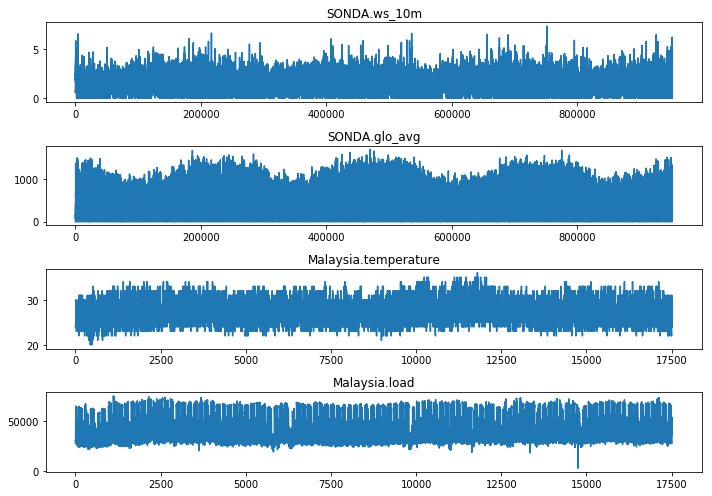

In [0]:
from pyFTS.data import SONDA, Malaysia

datasets = {}


sonda = SONDA.get_dataframe()[['datahora','glo_avg','ws_10m']]

sonda = sonda.drop(sonda.index[np.where(sonda["ws_10m"] <= 0.01)])
sonda = sonda.drop(sonda.index[np.where(sonda["glo_avg"] <= 0.01)])
sonda = sonda.dropna()


malaysia = Malaysia.get_dataframe()

datasets['SONDA.ws_10m'] = sonda["ws_10m"].values
datasets['SONDA.glo_avg'] = sonda["glo_avg"].values
datasets['Malaysia.temperature'] = malaysia["temperature"].values
datasets['Malaysia.load'] = malaysia["load"].values

fig, ax = plt.subplots(nrows=4, ncols=1,figsize=[10,7])

for ct, (dataset_name, dataset) in enumerate(datasets.items()):
  ax[ct].plot(dataset)
  ax[ct].set_title(dataset_name)

plt.tight_layout()


## Speed Up of Distributed Methods

### Batch execution of distributed training and testing

In [0]:
for ct, (dataset_name, dataset) in enumerate(datasets.items()):
    bchmk.train_test_time(dataset, windowsize=windows[ct], train=0.9, inc=.5,
                     methods=[pwfts.ProbabilisticWeightedFTS],
                     order=2,
                     partitions=50,
                     steps=cpus,
                     num_batches=cpus,
                     distributed='dispy', nodes=['192.168.0.110'], #, '192.168.0.107','192.168.0.106'],
                     file="experiments.db", dataset=dataset_name,
                     tag="speedup")

### Analysis

In [0]:
from pyFTS.benchmarks import Util as bUtil

speedup = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'speedup'")

speedup.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,289789,2019-06-20 15:25:45,SONDA.ws_10m,speedup,train,PWFTS,None,2,Grid,50,1099,1,train,time,778.587703
1,289790,2019-06-20 15:25:45,SONDA.ws_10m,speedup,train,PWFTS,None,2,Grid,50,1099,1,test,time,339.651428
2,289791,2019-06-20 15:44:01,SONDA.ws_10m,speedup,train,PWFTS,None,2,Grid,50,956,1,train,time,783.046727
3,289792,2019-06-20 15:44:01,SONDA.ws_10m,speedup,train,PWFTS,None,2,Grid,50,956,1,test,time,312.586078
4,289793,2019-06-20 15:55:41,SONDA.ws_10m,speedup,train,PWFTS,None,2,Grid,50,929,1,train,time,494.123480


In [0]:
datasets = speedup['Dataset'].unique()
steps = speedup['Steps'].unique()

rows = []

for dataset in datasets:
  for step in steps:
    df1 = speedup[(speedup['Dataset']==dataset)&(speedup['Steps']==step)&(speedup['Method']=='train')]
    df2 = speedup[(speedup['Dataset']==dataset)&(speedup['Steps']==step)&(speedup['Method']=='test')]
    if step == 1:
      t11 = np.nanmean(df1['Value'].values)
      t12 = np.nanmean(df2['Value'].values)
    sup1 = t11 / np.nanmean(df1['Value'].values)
    sup2 = t12 / np.nanmean(df2['Value'].values)
    rows.append([dataset, step, np.nanmean(df1['Value'].values), np.nanstd(df1['Value'].values), sup1,
                np.nanmean(df2['Value'].values), np.nanstd(df2['Value'].values), sup2])
    
final = pd.DataFrame(rows, columns=['Dataset','CPUs','Train AVG','Train STD', 'Train Sp', 
                                    'Forecast AVG', 'Forecast STD', 'Forecast Sp'])
final

,Dataset,CPUs,Train AVG,Train STD,Train Sp,Forecast AVG,Forecast STD,Forecast Sp
0,SONDA.ws_10m,1,685.252637,135.160982,1.000000,285.898533,57.943257,1.000000
1,SONDA.ws_10m,2,383.291453,72.508525,1.787811,164.825380,30.100893,1.734554
2,SONDA.ws_10m,3,330.133937,64.552898,2.075681,138.585535,25.371540,2.062975
3,SONDA.ws_10m,4,342.645503,52.861450,1.999888,151.342412,25.549767,1.889084
4,SONDA.ws_10m,5,300.750701,58.198957,2.278474,130.671621,23.202307,2.187916
5,SONDA.ws_10m,6,348.986640,67.416643,1.963550,153.160808,30.092389,1.866656
6,SONDA.ws_10m,7,361.455886,65.612328,1.895813,160.749442,30.688169,1.778535
7,SONDA.glo_avg,1,651.295863,121.958854,1.000000,274.286905,47.726966,1.000000
8,SONDA.glo_avg,2,383.243364,66.374207,1.699432,165.983408,36.213390,1.652496
9,SONDA.glo_avg,3,314.107107,59.989142,2.073483,136.923902,24.631289,2.003207


Text(0.5, 1.0, 'Forecasting')

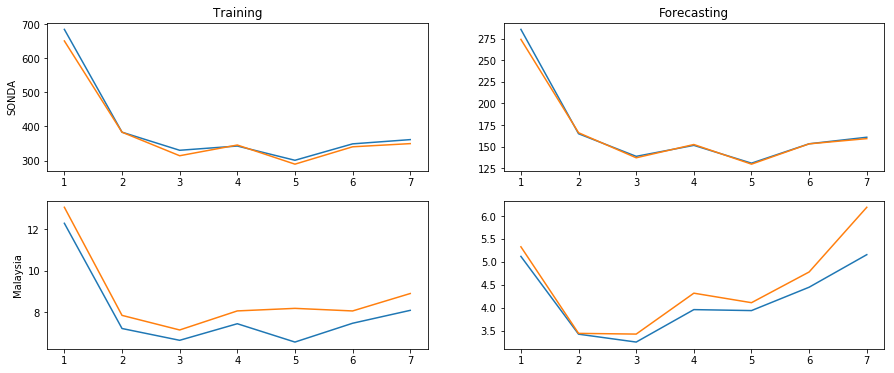

In [0]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[15,6])

datasets = final['Dataset'].unique()
steps = final['CPUs'].unique()

for dataset in datasets:
  if 'SONDA' in dataset:
    col = 0
  else:
    col = 1
  df1 = final[(final['Dataset']==dataset)]
  ax[col][0].plot(steps, df1['Train AVG'].values)
  ax[col][1].plot(steps, df1['Forecast AVG'].values)

ax[0][0].set_ylabel('SONDA')
ax[1][0].set_ylabel('Malaysia')
ax[0][0].set_title('Training')
ax[0][1].set_title('Forecasting')


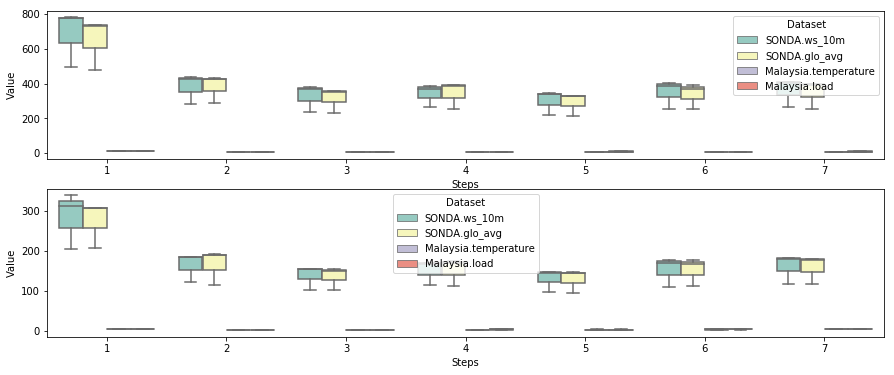

In [0]:
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[15,6])

df1 = speedup[(speedup['Method']=='train')]
df2 = speedup[(speedup['Method']=='test')]
g1 = sns.boxplot(x='Steps', y='Value', hue='Dataset', data=df1, showfliers=False, 
                     ax=ax[0], 
                     palette="Set3")
g1 = sns.boxplot(x='Steps', y='Value', hue='Dataset', data=df2, showfliers=False, 
                     ax=ax[1], 
                     palette="Set3")

## Convergence of DEHO

### Batch execution of the Distributed Evolutive Hyperparameter Optimization

In [0]:
from pyFTS.hyperparam import Evolutionary

for dataset_name, dataset in datasets.items():
  ret = Evolutionary.execute(datsetname, dataset,
                             # GA Parameters
                            ngen=30, npop=20, pcruz=.5, pmut=.3,
                             # Distributed Training Parameters
                            window_size=10000, train_rate=.9, increment_rate=1,
                            experiments=5,
                            distributed='dispy', nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'])
  

### Speed Up

### Convergence

In [0]:
import json

__patterns = ['SONDA_ws','SONDA_glo','Malaysia_load','Malaysia_temperature']

data = {}

for key in __patterns:
  files = !ls -1 *{key}*.json
  data[key] = []
  
  for fname in files:
    _json = json.loads(open(fname).read())
    data[key].append(len(_json))

print(data)

rows = []

for key in __patterns:
  rows.append([key, np.mean(data[key]), np.std(data[key])] )
  
pd.DataFrame(rows, columns=['Dataset','Generations AVG','Generations STD'])

{'SONDA_ws': [30, 30, 30, 30], 'SONDA_glo': [9, 19, 15, 30, 9], 'Malaysia_load': [13, 16, 12, 9], 'Malaysia_temperature': [28, 30, 8, 8, 9]}


,Dataset,Generations AVG,Generations STD
0,SONDA_ws,30.0,0.000000
1,SONDA_glo,16.4,7.787169
2,Malaysia_load,12.5,2.500000
3,Malaysia_temperature,16.6,10.150862


In [0]:
import json

def plot_generations_statistics(file):

  _data = json.loads(open(file).read())
  
  f1_geral = []
  f1_best = []
  f2_geral = []
  f2_best = []
  rmse_geral = []
  rmse_best = []
  size_geral = []
  size_best = []

  for gen in _data:
    pop = gen['population']
    best = gen['best']
    f1_geral.append( pop['f1'] )
    f1_best.append( best['f1'] )
    f2_geral.append( pop['f2'] )
    f2_best.append( best['f2'] )
    rmse_geral.append( pop['rmse'] )
    rmse_best.append( best['rmse'] )
    size_geral.append( pop['size'] )
    size_best.append( best['size'] )

  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[15,6])

  ax[0][0].plot(f1_geral)
  ax[0][0].plot(f1_best)
  ax[0][0].set_title("Objective 1")
  ax[0][0].set_xlabel("Generations")
  ax[0][0].set_ylabel("$f_1$")
  ax[0][1].plot(f2_geral, label='Population average')
  ax[0][1].plot(f2_best, label='Best individual')
  ax[0][1].set_title("Objective 2")
  ax[0][1].set_xlabel("Generations")
  ax[0][1].set_ylabel("$f_2$")

  handles, labels = ax[0][1].get_legend_handles_labels()
  lgd = ax[0][1].legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))


  ax[1][0].plot(rmse_geral)
  ax[1][0].plot(rmse_best)
  ax[1][0].set_title("RMSE")
  ax[1][0].set_xlabel("Generations")
  ax[1][0].set_ylabel("RMSE")
  ax[1][1].plot(size_geral, label='Population average')
  ax[1][1].plot(size_best, label='Best individual')
  ax[1][1].set_title("$|\mathcal{M}|$")
  ax[1][1].set_xlabel("Generations")
  ax[1][1].set_ylabel("$|\mathcal{M}|$")

  handles, labels = ax[1][1].get_legend_handles_labels()
  lgd = ax[1][1].legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

  plt.tight_layout()

In [0]:
!ls

experiments.db			       statistics_Malaysia_temperature4.json
hyperparameter.tar.gz		       statistics_Malaysia_temperature5.json
sample_data			       statistics_SONDA_glo_avg1.json
statistics_Malaysia_load1.json	       statistics_SONDA_glo_avg2.json
statistics_Malaysia_load2.json	       statistics_SONDA_glo_avg3.json
statistics_Malaysia_load3.json	       statistics_SONDA_glo_avg4.json
statistics_Malaysia_load4.json	       statistics_SONDA_glo_avg5.json
statistics_Malaysia_temperature1.json  statistics_SONDA_ws_10m1.json
statistics_Malaysia_temperature2.json  statistics_SONDA_ws_10m2.json
statistics_Malaysia_temperature3.json  statistics_SONDA.ws_10m.json


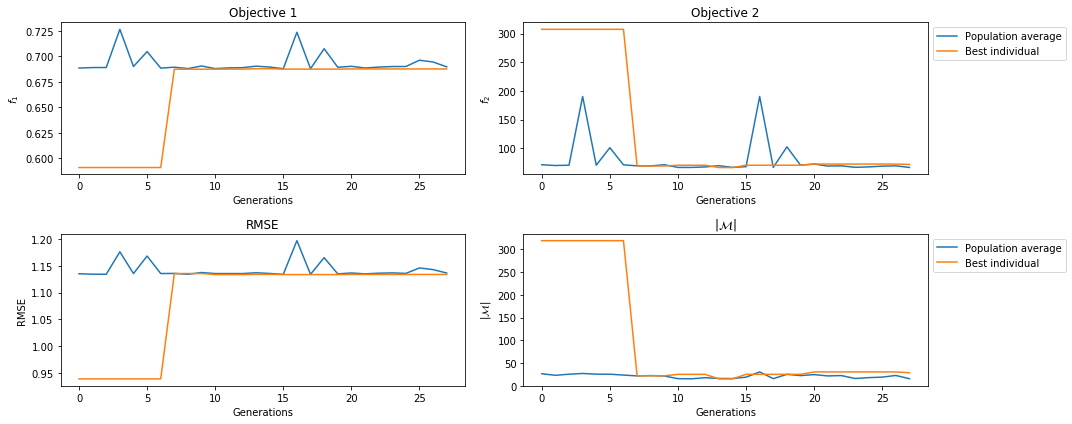

In [0]:
plot_generations_statistics('statistics_Malaysia_temperature1.json')

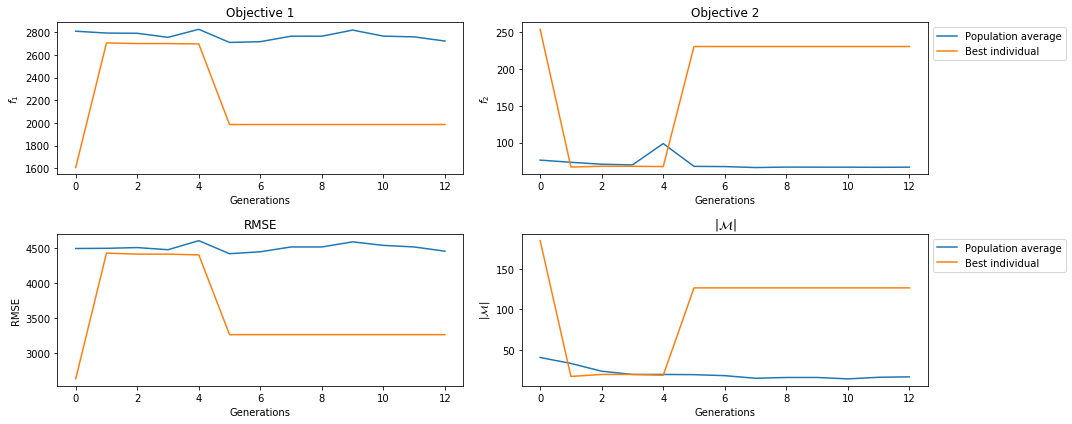

In [0]:
plot_generations_statistics('statistics_Malaysia_load1.json')

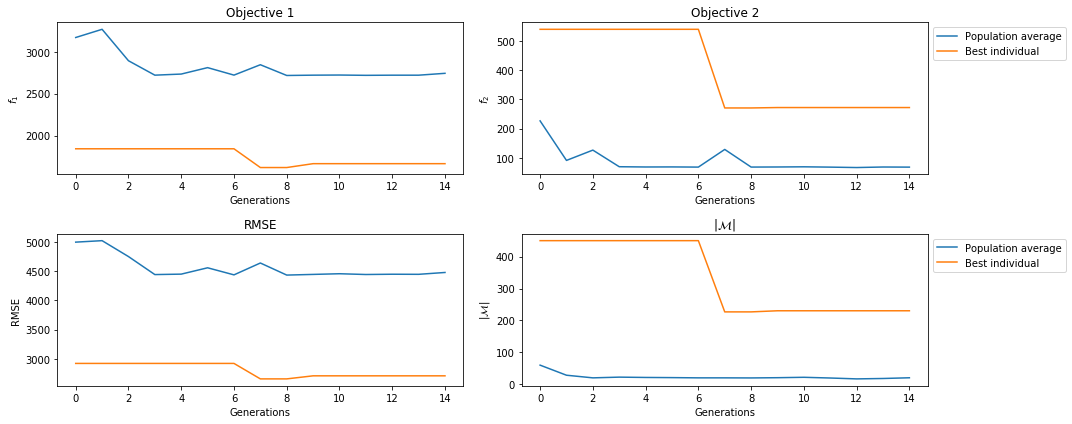

In [0]:
plot_generations_statistics('statistics_SONDA_glo_avg3.json')

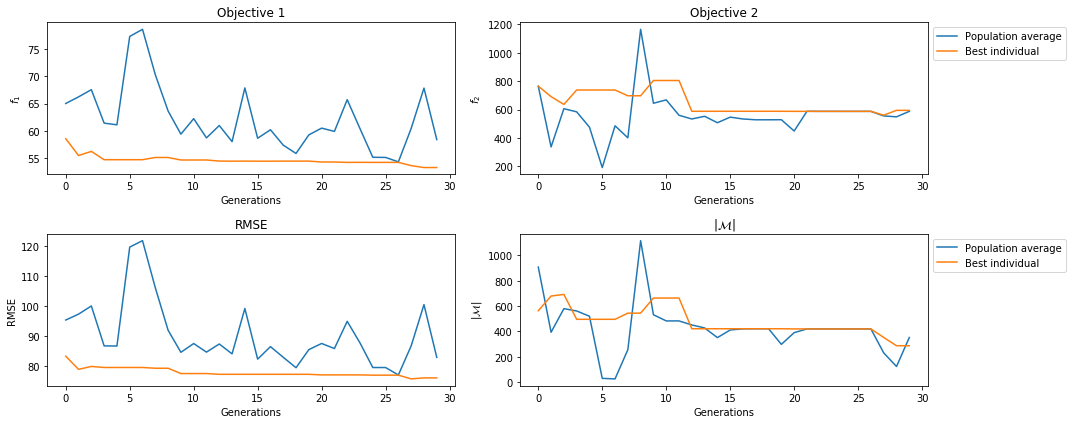

In [0]:
plot_generations_statistics('statistics_SONDA_ws_10m2.json')

In [0]:
import sqlite3 
import pandas as pd

def query_bd(file, select = "*", where = "", orderby = "", groupby = ""):
  con = sqlite3.connect(file)
  sql = "SELECT {} from hyperparam".format(select)
  if len(where) > 0:
    sql += " WHERE " + where
  if len(orderby) > 0:
    sql += " ORDER BY " + orderby
  if len(groupby) > 0:
    sql += " GROUP BY " + groupby
  return pd.read_sql_query(sql, con)

In [0]:
df_rmse = query_bd("experiments.db", select="Dataset, cast(mf as int) as mf, alpha, [Order], unicode(partitions) as Partitions, lags, Value",
          where="measure = 'rmse'")
df_size = query_bd("experiments.db", select="Dataset, Value",
          where="measure = 'size'")
df_time = query_bd("experiments.db", select="Dataset, Value",
          where="measure = 'time'")

datasets = df_rmse['Dataset'].unique()

rows = []

for dataset in datasets:
  df2 = df_rmse[(df_rmse['Dataset']==dataset)]
  df3 = df_size[(df_size['Dataset']==dataset)]
  df4 = df_time[(df_time['Dataset']==dataset)]
  size_avg = np.mean(df3['Value'].values)
  size_std = np.std(df3['Value'].values)
  rmse_avg = np.mean(df2['Value'].values)
  rmse_std = np.std(df2['Value'].values)
  time_avg = np.mean(df4['Value'].values)
  time_std = np.std(df4['Value'].values)
  mf = np.median(df2['mf'].values)
  alpha_avg = np.mean(df2['alpha'].values)
  alpha_std = np.std(df2['alpha'].values)
  order = np.median(df2['Order'].values)
  partitions_avg = np.mean(df2['Partitions'].values)
  partitions_std = np.std(df2['Partitions'].values)
  l = int(len(df2.index.values)/2)
  lags = df2.sort_values('Value')['lags'].values[l]
  rows.append([dataset, mf, alpha_avg, alpha_std, order, partitions_avg, partitions_std, lags, size_avg, size_std,rmse_avg,rmse_std,time_avg,time_std])
  
final = pd.DataFrame(rows, columns=['dataset', 'mf', 'alpha_avg', 'alpha_std', 'order', 
                            'partitions_avg', 'partitions_std','lags', 'size_avg', 'size_std','rmse_avg',
                            'rmse_std','time_avg','time_std'])

#print(final.to_latex())
final

,dataset,mf,alpha_avg,alpha_std,order,partitions_avg,partitions_std,lags,size_avg,size_std,rmse_avg,rmse_std,time_avg,time_std
0,SONDA.glo_avg,2.0,0.244419,0.131965,2.0,50.8,0.748331,"[1, 2]",615.050,222.624707,93.133992,0.622979,3221.225966,1505.087144
1,Malaysia.load,2.0,0.221632,0.230693,2.0,50.6,1.200000,"[1, 2]",306.950,137.940150,2745.518289,271.273481,3945.091704,800.712000
2,Malaysia.temperature,1.0,0.241830,0.098108,1.0,52.8,3.187475,[1],78.800,73.211235,1.083307,0.067689,3916.587386,2042.121357
3,SONDA.ws_10m,1.0,0.129741,0.103662,1.0,50.0,0.000000,[1],24.475,1.450000,0.340442,0.000074,3058.269076,891.874242


## Samples